# ITCS 3162 - Assignment 4

### Name: Harsh Patel

### Submission instructions

- Enter your name in the space above.  
- Save your completed json as *itcs3162_assignment_4_**\<uncc username>**.ipynb*.
- Upload **both** the **ipynb** file and the **html** file version of your completed notebook to Canvas.  

You can download the notebook in html format by going to *File --> Download as --> HTML*

***

## Topic Modeling on Texts using Latent Semantic Analysis  
*Document-Term Matrix, TF-IDF, SVD, and K-means*

For this assignment, you will try to discover a set of topics discussed in a dataset of tweets posted by Russian accounts during the 2016 election season.

For this task, you will use the *pandas* and *scikit-learn* packages to generate Document-Term and TF-IDF matrices representing your tweets dataset. You will apply TruncatedSVD to reduce the dimensionality of our data before applying K-Means clustering to group documents into clusters (topics).

## Part 1 - Load and preprocess the data (5 points)

Use the pandas library to read in the provided *russian_tweets.csv* file.

*Refer to the documentation of read_csv() if you're unsure*.

- Make sure that each column has the appropriate datatype (date columns should be converted to datetime).
- Check for missing values. Remove rows that contain missing values.

In [1]:
import pandas as pd

In [2]:
tweets_df = pd.read_csv('russian_tweets.csv', header=0, parse_dates=['date'])
tweets_df.dropna() #dropping missing values
tweets_df.info()
tweets_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203451 entries, 0 to 203450
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   user_name  203451 non-null  object        
 1   date       203430 non-null  datetime64[ns]
 2   text       201109 non-null  object        
 3   tweet_id   201137 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 6.2+ MB


,user_name,date,text,tweet_id
0,kathiemrr,2017-02-27 14:54:00,thingsdonebymistake kissing auntie in the lips,8.362279e+17
1,traceyhappymom,2016-08-15 14:50:20,theolderweget the more pessimistic we are,7.651989e+17
2,evewebster373,2015-06-30 21:56:09,ready to feel like a failure joan of arc was o...,6.160023e+17
3,blacktolive,2016-09-16 08:04:48,amen blacklivesmatter,7.766933e+17
4,jacquelinisbest,2016-09-18 19:46:25,twitchy chuck todd caught out there shilling f...,7.775946e+17
...,...,...,...,...
203446,cookncooks,2016-12-03 03:16:17,6 rexnord bearings is set to close its plant i...,8.048869e+17
203447,newspeakdaily,2016-09-30 23:39:11,will trump’s bad week hurt the gop’s senate pr...,7.820019e+17
203448,specialaffair,2016-09-05 10:45:09,china blames united states journalists for oba...,7.727474e+17
203449,patriotblake,2017-02-06 12:36:14,💥💥 presidentelecttrump absolutely must watch t...,8.285831e+17


## Part 2 - Exploratory Data Analysis (EDA) (15 points)

Before beginning any analysis, it is beneficial to do some data exploration to get a sense of your data.

For this part, refer to the pandas *GroupBy* documentation if you are unsure.

#### Part A - Plot the top 20 users who posted the most tweets

1. Group your tweets dataframe by the user_name column.
2. Get the size of each user_name "group" (i.e. the number of tweets posted by each user).
3. Plot the top 20 users in descending order in a barplot. Make sure your plot has appropriate axis labels and title.

*Note: Look in the sklearn documentation for a groupby function that returns the size of each group*

In [3]:
tweets_df.groupby('user_name').first()

,date,text,tweet_id
user_name,,,
4ever1937,2016-09-14 20:46:44,on trump can you imagine ronald reagan idolizi...,7.761603e+17
4mysquad,2016-11-18 14:21:11,audience member run for president michelle obama,7.996185e+17
6druz,2016-11-10 08:12:07,video game violence glorification must be stop...,7.966265e+17
_billy_moyer_,2015-01-11 14:06:58,i wanted to learn a few foreign languages and ...,5.542783e+17
_nickluna_,2016-09-19 13:20:08,hillary clinton obama and the democrats use th...,7.778598e+17
...,...,...,...
yattvrussia,2016-11-09 18:20:47,congratulations from russia,7.964173e+17
youjustctrlc,2016-10-20 08:47:06,attorney general discusses federal election mo...,7.890251e+17
zistti,2016-11-18 07:33:37,donald trump teases a president bid during a 1...,7.995159e+17


In [4]:
grp_uname = tweets_df.groupby('user_name')['user_name'].count().sort_values(ascending=False).head(20)
grp_uname

user_name
ameliebaldwin      9269
hyddrox            6813
giselleevns        6652
patriotblake       4140
thefoundingson     3663
melvinsroberts     3346
mrclydepratt       3263
brianaregland      3261
leroylovesusa      3229
baobaeham          3215
melanymelanin      3212
laurabaeley        3201
datwisenigga       3197
jeffreykahunas     3197
ten_gop            3194
emileewaren        3192
garrettsimpson_    3188
jacquelinisbest    3169
_nickluna_         3159
michellearry       3156
Name: user_name, dtype: int64

<AxesSubplot:title={'center':'Top 20 Users'}, xlabel='Users', ylabel='No. of Tweets'>

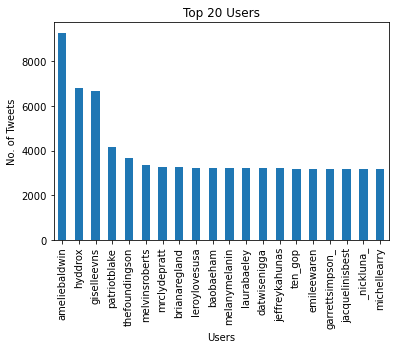

In [5]:
grp_uname.plot.bar(title='Top 20 Users', xlabel='Users', ylabel='No. of Tweets')

#### Part B - Time Series Plot

1. Group you tweet dataframe by the date (you will need to get the **date** component from the datetime timestamp).
2. Get the size of each date "group" (i.e. the number of tweets posted on each day).
3. Plot the time series of the number of tweets per day. Make sure your plot has appropriate axis labels and title.

In [6]:
tweets_df.groupby(pd.Grouper(key='date', axis=0, freq='D', sort=True)).count()
# josh date_dtweets = tweets.groupby(tweets['date'].dt.date).size()

,user_name,text,tweet_id
date,,,
2014-07-14,1,1,1
2014-07-15,0,0,0
2014-07-16,0,0,0
2014-07-17,1,1,1
2014-07-18,0,0,0
...,...,...,...
2017-09-22,0,0,0
2017-09-23,0,0,0
2017-09-24,1,1,1


In [7]:
grp_date = tweets_df.groupby(pd.Grouper(key='date', axis=0, freq='D', sort=True)).tweet_id.count()
grp_date

date
2014-07-14    1
2014-07-15    0
2014-07-16    0
2014-07-17    1
2014-07-18    0
             ..
2017-09-22    0
2017-09-23    0
2017-09-24    1
2017-09-25    0
2017-09-26    3
Name: tweet_id, Length: 1171, dtype: int64

<AxesSubplot:title={'center':'Tweets Trend by Day'}, xlabel='Days', ylabel='Tweets'>

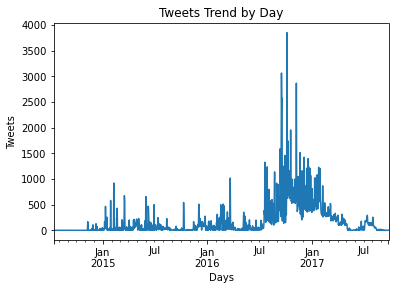

In [8]:
grp_date.plot(title='Tweets Trend by Day', xlabel='Days', ylabel='Tweets')

#### Part C - Word Frequencies

Below I have provided a plot of the frequency of word occurrences in our dataset. This will help inform your choice of maximum number of terms to include in our document matrices.

You can see the characteristic "elbow" shape described by **Zipf's Law**.

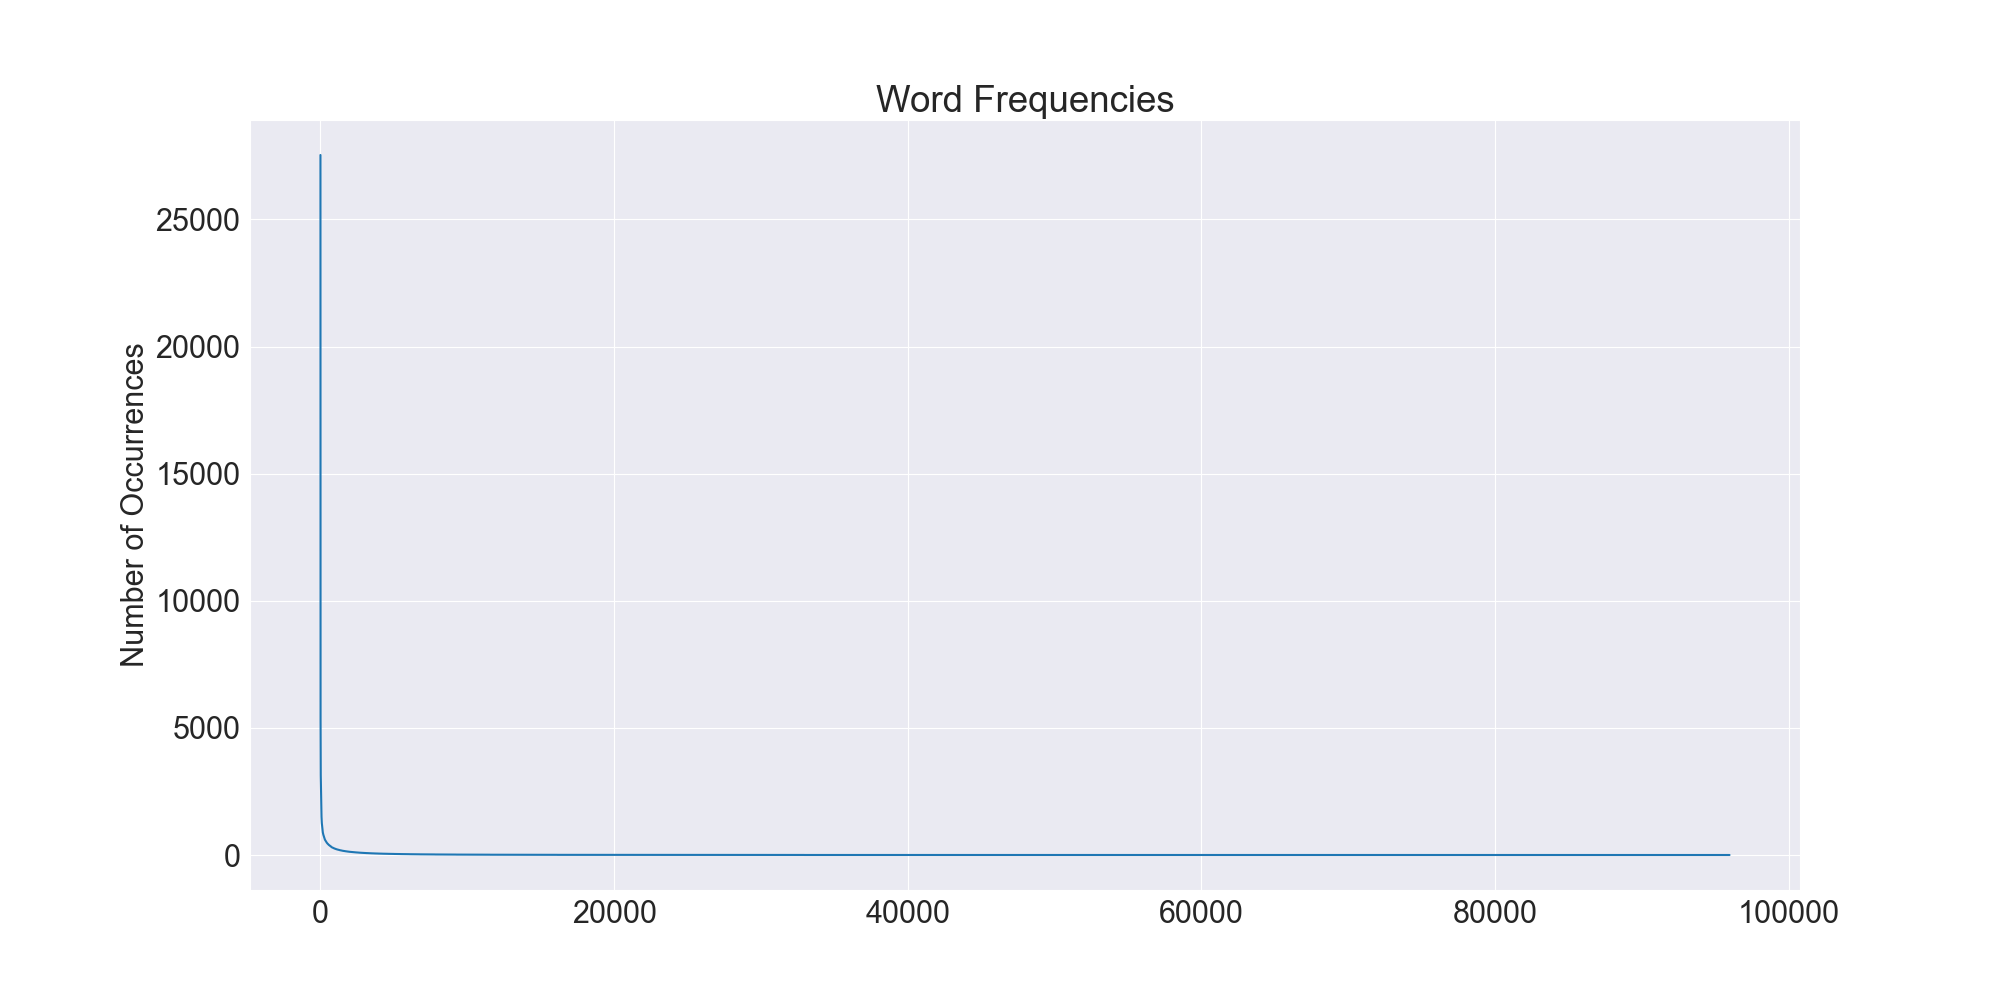

## Part 3 - Document-Term and TF-IDF Matrices (25 points)

Create the Document-Term and TF-IDF matrices representing our tweets dataset.

**You should initialize and fit *separate* models throughout for the Document-Term and TF-IDF matrices**.

- Be sure to **lowercase all text** and **remove stopwords** when initializing the model.
- Set a maximum number of terms to include in the matrices.

*Note: Refer to the scikit-learn documentation for the above initialization parameters*.

#### Part A  - Document-Term Matrix

1. Initialize the appropriate scikit-learn model that will generate a Document-Term matrix from a set of texts.
2. Fit the model to our data and transform our raw texts into a Document-Term matrix.

In [9]:
from sklearn.feature_extraction import text as skText

In [10]:
doct_vectorizer = skText.CountVectorizer(stop_words='english', max_features=5000) # doc-term model

In [11]:
X = doct_vectorizer.fit_transform(tweets_df['text'].values.astype(str)) # X is doc-term matrix

**Print the shape of our resulting matrix**

How many documents and how many words does our Document-Term matrix include?

In [12]:
print('Shape: ' + str(X.shape))
print('Docs: ' + str(X.shape[0]))
print('Words: ' + str(X.shape[1]))

Shape: (203451, 5000)
Docs: 203451
Words: 5000


#### Part B - TF-IDF Matrix

1. Initialize the appropriate scikit-learn model that will generate a TF-IDF matrix from a set of texts.
2. Fit the model to our data and transform our raw texts into a TF-IDF matrix.

In [13]:
tfidf_vectorizer = skText.TfidfVectorizer(stop_words='english', max_features=5000) # tf-idf model

In [14]:
tf_idf_X = tfidf_vectorizer.fit_transform(tweets_df['text'].values.astype(str)) # tf_idf_X is tf-idf matrix

## Part 4 - Dimensionality Reduction (25 points)

Use sklearn's TruncatedSVD to discover latent factors and reduce the dimensionality of our document matrices.

#### Part A - Perform dimensionality reduction on our document matrices

For latent semantic analysis, it is recommended that the **number of components be set to ~100**.

1. Initialize the appropriate scikit-learn model that will apply SVD dimensionality reduction on a matrix.
2. Fit the model to our Document-Term matrix, and transform our matrix to one with reduced dimensions.

In [15]:
from sklearn.decomposition import TruncatedSVD 

In [16]:
doct_svd = TruncatedSVD(n_components=100) # svd model with 100 components
X = doct_svd.fit_transform(X) # fit doc-term matrix into model

1. Initialize the appropriate scikit-learn model that will apply SVD dimensionality reduction on a matrix.
2. Fit the model to our TF-IDF matrix, and transform our matrix to one with reduced dimensions.

In [17]:
tfidf_svd = TruncatedSVD(n_components=100) # svd model with 100 components

In [18]:
tf_idf_X = tfidf_svd.fit_transform(tf_idf_X)
tf_idf_X

array([[ 6.09486636e-08,  1.38563659e-03, -1.54820318e-04, ...,
         4.12382704e-04, -1.24423221e-05, -7.32836485e-04],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 6.39009712e-07,  2.52117240e-02,  9.90631898e-03, ...,
         1.32051721e-03, -1.48611327e-02, -6.09809348e-03],
       ...,
       [ 1.03870351e-06,  6.12504765e-02,  2.09117364e-02, ...,
         5.09445635e-02,  1.74252115e-02,  2.47813688e-02],
       [ 1.81966841e-06,  7.50311912e-02,  2.18587066e-02, ...,
        -1.03103182e-02,  1.14875994e-02,  2.71867110e-02],
       [ 3.26541399e-08,  1.67589977e-03, -1.90632799e-04, ...,
        -1.04342723e-03, -1.48652517e-03,  3.58482894e-03]])

#### Part B - Data normalization

After applying SVD, re-normalize our data so clusters will be more "spherical" (better for k-means)

Use the Normalizer class provided in the *sklearn.preprocessing* package to normalize both our reduced Document-Term and TF-IDF matrices.

1. Initialize the appropriate scikit-learn model.
2. Fit the model to our reduced Document-Term matrix, and transform our matrix to a normalized one.

In [19]:
from sklearn.preprocessing import Normalizer

In [20]:
doct_transformer = Normalizer().fit(X)
X = doct_transformer.fit_transform(X)

1. Initialize the appropriate scikit-learn model.
2. Fit the model to our reduced TF-IDF matrix, and transform our matrix to a normalized one.

In [21]:
tfidf_transformer = Normalizer().fit(tf_idf_X)

In [22]:
tf_idf_X = tfidf_transformer.fit_transform(tf_idf_X)

## Part 5 - Topic Modeling (30 points)

- Cluster our document matrices using the k-means algorithm.
- Analyze the top terms associated with each cluster. Try to determine a general topic to describe each cluster.
- Compare the performance of Document-Term and TF-IDF matrices. Which performed better in your opinion?

#### Part A - Determine the best k value

1. Initialize the appropriate scikit-learn model.
2. Fit the clustering model to our reduced and normalized Document-Term matrix.
3. Run the clustering experiment for a number of k-values.
4. Plot the sum of squared distances of samples to their closest cluster center. *Refer to sklearn documentation to find this value (You do not have to do any computation)*.
5. Choose the best k value. What value did you choose?

In [23]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

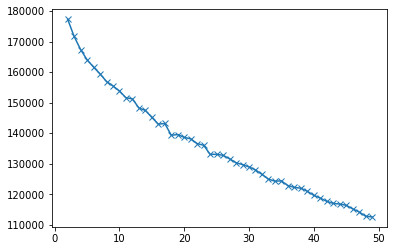

In [24]:
k_inertia = []
for k in range(2, 50):
    kmeans = KMeans(n_clusters=k).fit(X)
    k_inertia.append(kmeans.inertia_)
    
plt.plot(range(2, 50), k_inertia, marker='x')

In [25]:
# k=30 has seemes to be the best k value^
best_k = 30

#### Part B  - Cluster Document-Term and TF-IDF Matrices

Run k-means clustering on our reduced and normalized Document-Term matrix using the k-value you selected in Part A.

In [26]:
doct_kmeans = KMeans(n_clusters = best_k).fit(X)

Run k-means clustering on our reduced and normalized TF-IDF matrix using the k-value you selected in Part A.

In [27]:
tfidf_kmeans = KMeans(n_clusters = best_k).fit(tf_idf_X)

#### Part C - Cluster analysis and topic modeling

The function below will print out the top words associated with each cluster.

You need to provide the fitted scikit-learn **Vectorizer** model, **SVD** model, and **KMeans** model as arguments to this function.

*Note: The cluster numbers will not line up between the different result sets (i.e. Cluster 1 from Doc-Term will not be the same as Cluster 1 from TF-IDF)*.

In [28]:
def get_top_terms_per_cluster(vectorizer, svd, kmeans, n_terms=20):
    original_space_centroids = svd.inverse_transform(kmeans.cluster_centers_)
    cluster_word_indices = original_space_centroids.argsort()[:, :-(n_terms+1):-1]
    
    terms = vectorizer.get_feature_names()
    
    print('Top terms per cluster:')
    for cluster_num, word_indices in enumerate(cluster_word_indices):
        print(f'Cluster {cluster_num}:')
        for i in word_indices:
            print(f'\t{terms[i]}')
        print()

Print the top terms associated with each cluster generated from the Document-Term matrix.

In [29]:
get_top_terms_per_cluster(doct_vectorizer, doct_svd, doct_kmeans)

Top terms per cluster:
Cluster 0:
	youre
	wrong
	trump
	just
	doing
	like
	dont
	right
	im
	tell
	welcome
	know
	going
	party
	hate
	people
	voting
	got
	bad
	life

Cluster 1:
	better
	twitter
	year
	hes
	got
	house
	big
	woman
	free
	youre
	look
	party
	obamas
	best
	lets
	good
	truth
	family
	money
	im

Cluster 2:
	clinton
	hillary
	campaign
	politics
	foundation
	fbi
	emails
	email
	trump
	says
	wikileaks
	president
	state
	poll
	video
	breaking
	vote
	dnc
	voters
	media

Cluster 3:
	news
	trump
	post
	fake
	clinton
	fox
	election
	world
	cnn
	media
	breaking
	says
	gop
	network
	good
	obama
	local
	just
	texas
	chicago

Cluster 4:
	day
	election
	happy
	love
	today
	black
	trump
	just
	got
	year
	stop
	ihaveadreamthat
	politics
	money
	new
	good
	days
	im
	end
	convention

Cluster 5:
	year
	family
	tell
	truth
	obamas
	lets
	read
	happy
	money
	house
	thing
	law
	2a
	thank
	old
	look
	gun
	htt
	use
	believe

Cluster 6:
	new
	trump
	post
	york
	clinton
	poll
	video
	year
	times
	ema

Print the top terms associated with each cluster generated from the TF-IDF matrix.

In [30]:
get_top_terms_per_cluster(tfidf_vectorizer, tfidf_svd, tfidf_kmeans)

Top terms per cluster:
Cluster 0:
	country
	trump2016
	trump
	makeamericagreatagain
	come
	live
	trumptrain
	wakeupamerica
	neverhillary
	wrong
	americans
	obama
	fbi
	doesnt
	makemehateyouinonephrase
	work
	refugees
	true
	doing
	needs

Cluster 1:
	police
	muslim
	free
	year
	breaking
	support
	woman
	trumps
	americans
	hate
	let
	man
	killed
	women
	years
	blacklivesmatter
	work
	war
	state
	video

Cluster 2:
	maga
	trumptrain
	trump
	trumppence16
	trump2016
	neverhillary
	trumpforpresident
	tcot
	americafirst
	draintheswamp
	hillary
	votetrump
	wakeupamerica
	crookedhillary
	lnyhbt
	vote
	america
	makeamericagreatagain
	rally
	clinton

Cluster 3:
	doesnt
	oh
	thing
	free
	come
	hes
	makemehateyouinonephrase
	woman
	reallifemagicspells
	change
	family
	look
	thingsmoretrustedthanhillary
	makes
	does
	remember
	things
	better
	read
	ill

Cluster 4:
	free
	year
	todolistbeforechristmas
	music
	party
	nowplaying
	christmas
	speech
	christmasaftermath
	2016
	thanks
	truth
	end
	best
	let

**Question 1**: Choose three clusters from your results above on the Document-Term matrix. What general topic describes each cluster?

**Question 2**: Choose three clusters from your results above on the TF-IDF matrix. What general topic describes each cluster?

**Question 3**: Which document matrix format generated better results and more coherent clusters?

**Answer 1**:
<ul>
<li>Cluster 12: Police brutality on people of colour</li>
<li>Cluster 29: Antihillary and Muslim Women Racism</li>
<li>Cluster 24: Rally to support president</li>
</ul>

 
 

**Answer 2**:
<ul>
<li>Cluster 0: Support for Trump</li>
<li>Cluster 8: Black Lives Matter</li>
<li>Cluster 17: Iran War ISIS</li>
</ul>

**Answer 3**:<br>
TF-IDF matrix seems to have generated better and more coherent clusters compared to document-term matrix. 